In [1]:
import pandas as pd
from transformers import AutoTokenizer
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

/home/monsh/anaconda3/envs/lawbuddy/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
model_name = "clicknext/phayathaibert"
tokenizer = AutoTokenizer.from_pretrained(model_name)

In [3]:
df = pd.concat(
    pd.read_csv(x) for x in Path("../data").glob("*.csv")
)

df['length'] = df['text'].apply(lambda x: len(x))
df['n_token'] = df['text'].apply(lambda x: len(tokenizer(x)['input_ids']))

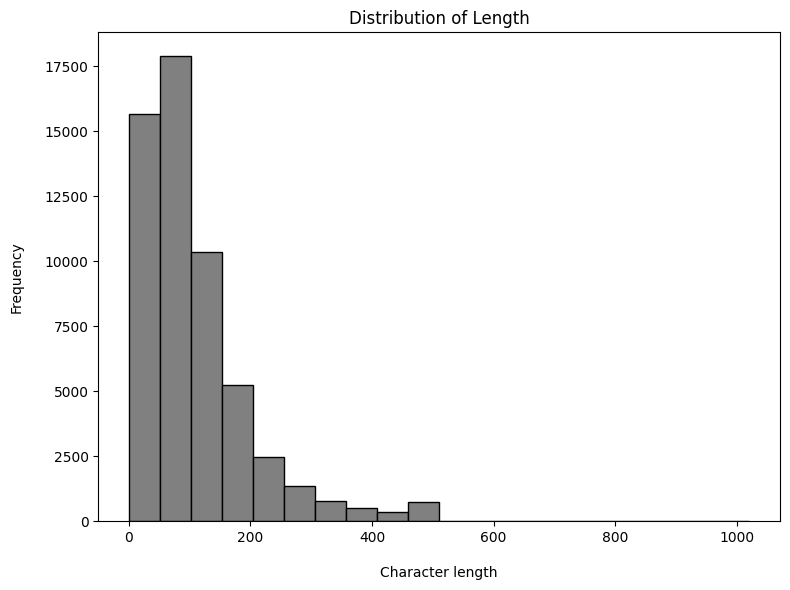

In [ ]:
# Count the occurrences of each category
# length_counts = df['length']

plt.figure(figsize=(8, 6))
plt.hist(df['length'], bins=20, color='gray', edgecolor='black')
plt.title('Distribution of Length')
plt.xlabel('Character length')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


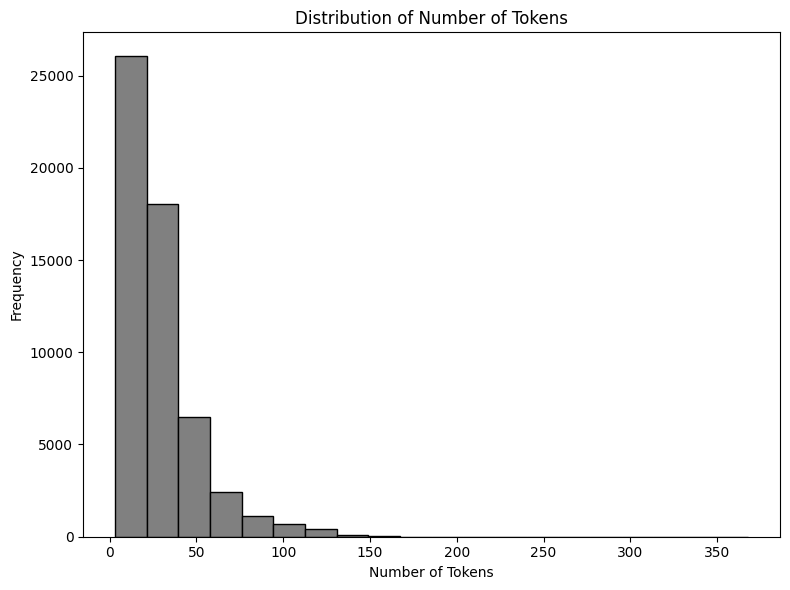

In [7]:
# Count the occurrences of each category
# length_counts = df['length']

plt.figure(figsize=(8, 6))
plt.hist(df[df['length'] <= 500]['n_token'], bins=20, color='gray', edgecolor='black')
plt.title('Distribution of Number of Tokens')
plt.xlabel('Number of Tokens')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


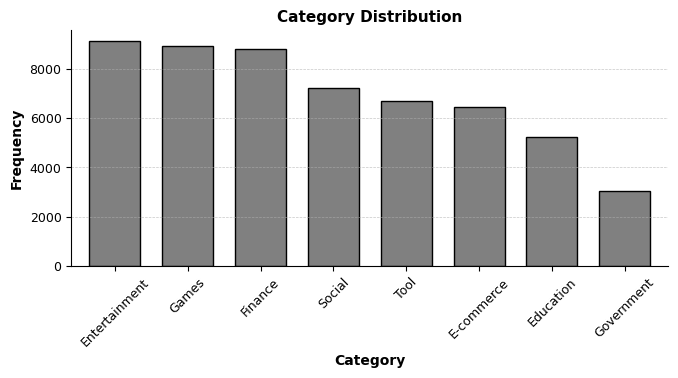

In [6]:
# Count the occurrences of each category
category_counts = df['category'].value_counts()
# Plot the histogram
plt.figure(figsize=(7, 4))  # IEEE prefers concise visualizations
category_counts.plot(kind='bar', color='gray', edgecolor='black', width=0.7)

# Add labels and title
plt.xlabel('Category', fontsize=10, fontweight='bold')  # Use bold for better readability
plt.ylabel('Frequency', fontsize=10, fontweight='bold')
plt.title('Category Distribution', fontsize=11, fontweight='bold')

# Add gridlines (dashed)
plt.grid(axis='y', linestyle='--', linewidth=0.5, alpha=0.7)

# Customize ticks
plt.xticks(fontsize=9, rotation=45)  # Rotated for fitting
plt.yticks(fontsize=9)

# Remove spines for a clean look
plt.gca().spines['top'].set_visible(False)
plt.gca().spines['right'].set_visible(False)

# Adjust layout for IEEE paper
plt.tight_layout(pad=1.5)
plt.show()


In [10]:
df[df['length'] > 500]['name'].unique()

array(['จอยลดา อาณาจักรแห่งความบันเทิง', 'SF Cinema',
       'JOOX - เพลงคุณภาพสูง', 'MONOMAX บริการดูหนังออนไลน์',
       'foodpanda: อาหาร & ของใช้', 'WeChat'], dtype=object)

In [7]:
df[['category', 'games']].value_counts()

category
Entertainment    9119
Games            8938
Finance          8795
Social           7237
Tool             6681
E-commerce       6430
Education        5246
Government       3022
Name: count, dtype: int64